<a href="https://colab.research.google.com/github/MubinMaldar29/Diabetes-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [6]:
house_price_dataset = pd.read_csv('/content/hou_all.csv')

In [10]:
house_price_dataset.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [11]:
house_price_dataset['1.1'] = house_price_dataset['1.1'].astype(int)

In [12]:
house_price_dataset.head()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
1,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
2,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
3,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
4,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,1


In [13]:
# checking the number of rows and columns in the data set
house_price_dataset.shape

(505, 15)

In [14]:
# check for missing value
house_price_dataset.isnull().sum()

,0
0.00632,0
18,0
2.31,0
0,0
0.538,0
6.575,0
65.2,0
4.09,0
1,0
296,0


In [15]:
# statistical measures of the dataset
house_price_dataset.describe()

,0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24,1.1
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.0
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901,1.0
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991,0.0
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000,1.0
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000,1.0
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000,1.0
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000,1.0
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000,1.0


Understanding the correlation between various features in the dataset

1.Positive Correlation

2.Negative Correlation

In [16]:
correlation = house_price_dataset.corr()

<Axes: >

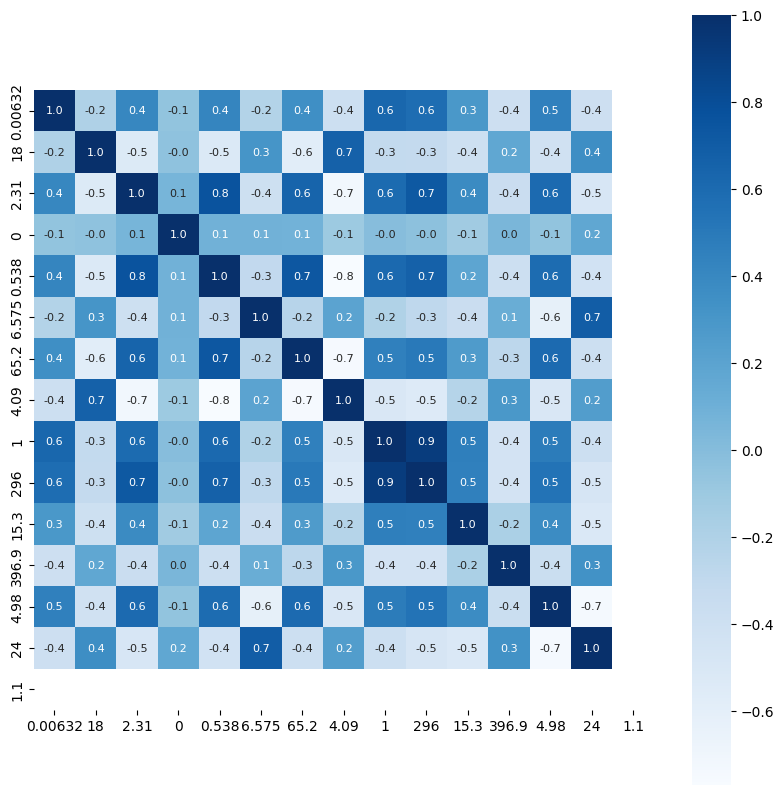

In [18]:
# constructing a heatmap to understand the correlation
plt.figure(figsize = (10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data

In [19]:
X = house_price_dataset.drop(['1.1'], axis=1)
Y = house_price_dataset['1.1']

In [20]:
print(X)
print(Y)

     0.00632   18   2.31  0  0.538  6.575  65.2    4.09  1  296  15.3   396.9  \
0    0.02731  0.0   7.07  0  0.469  6.421  78.9  4.9671  2  242  17.8  396.90   
1    0.02729  0.0   7.07  0  0.469  7.185  61.1  4.9671  2  242  17.8  392.83   
2    0.03237  0.0   2.18  0  0.458  6.998  45.8  6.0622  3  222  18.7  394.63   
3    0.06905  0.0   2.18  0  0.458  7.147  54.2  6.0622  3  222  18.7  396.90   
4    0.02985  0.0   2.18  0  0.458  6.430  58.7  6.0622  3  222  18.7  394.12   
..       ...  ...    ... ..    ...    ...   ...     ... ..  ...   ...     ...   
500  0.06263  0.0  11.93  0  0.573  6.593  69.1  2.4786  1  273  21.0  391.99   
501  0.04527  0.0  11.93  0  0.573  6.120  76.7  2.2875  1  273  21.0  396.90   
502  0.06076  0.0  11.93  0  0.573  6.976  91.0  2.1675  1  273  21.0  396.90   
503  0.10959  0.0  11.93  0  0.573  6.794  89.3  2.3889  1  273  21.0  393.45   
504  0.04741  0.0  11.93  0  0.573  6.030  80.8  2.5050  1  273  21.0  396.90   

     4.98    24  
0    9.14

splitting the data into Training data and Test data

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(505, 14) (404, 14) (101, 14)


Model Training

XGBoost Regressor

In [25]:
# loading the model
model = XGBRegressor()

In [26]:
# training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Evaluation

Prediction on training data

In [27]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [30]:
print(training_data_prediction)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

In [31]:
# R squared error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

In [32]:
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)


R squared error :  1.0
Mean Absolute Error :  0.0


Visualizing the actual price and predicted price

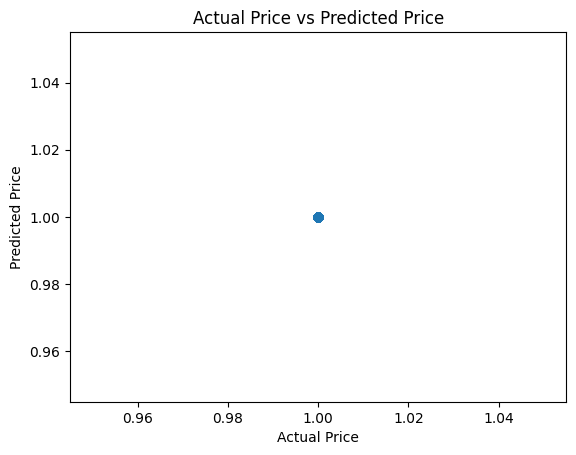

In [36]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

Prediction on Test Data

In [33]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [34]:
# R squread error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

In [35]:
print("R squared error : ", score_1)
print('Mean Absolute Error : ', score_2)

R squared error :  1.0
Mean Absolute Error :  0.0
